# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Datafiles/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


Looks like we can remove 'Unnamed: 0' and 'Customer Id'. The data is all numeric, so we only need a scaler. Since this is an unsupervised task, we do not need to train test split our data

In [3]:
df.duplicated().sum()

0

In [4]:
# dropping columns
df.drop(columns = ['Unnamed: 0','Customer Id'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


It looks like we have some nulls for Defaulted as well.

**Note** I left this error in my previous notebook but I am removing it here. I know that nulls create errors, so I will clean out the null values prior to running the model

In [5]:
df['Defaulted'].fillna(0, inplace = True)
# Info to confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        850 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


# Scaler and model

In [6]:
# Creating the Scaler and a scaled dataframe
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns = df.columns)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,850.0,-2.152527e-16,1.000589,-1.870097,-0.750235,-0.128089,0.742915,2.609353
Edu,850.0,-1.034467e-16,1.000589,-0.766349,-0.766349,-0.766349,0.312122,3.547538
Years Employed,850.0,-5.642545e-17,1.000589,-1.264543,-0.821666,-0.231164,0.654589,3.607100
Income,850.0,6.478478e-17,1.000589,-0.874220,-0.588657,-0.303094,0.235582,10.366584
Card Debt,850.0,-5.433562e-17,1.000589,-0.736527,-0.562141,-0.325625,0.151408,8.935446
Other Debt,850.0,-7.314411e-17,1.000589,-0.892833,-0.598511,-0.316702,0.242722,9.455440
Defaulted,850.0,-1.212102e-16,1.000589,-0.523797,-0.523797,-0.523797,-0.523797,1.909138
DebtIncomeRatio,850.0,2.716781e-17,1.000589,-1.499764,-0.755217,-0.219142,0.540296,4.635308


Because we need to loop through the values for k, we do not need to start with a base model. I will go directly into looping through possible k values from 2 to 25

## Inertia

In [7]:
clusters = np.arange(2, 26, 1)
inertias = pd.DataFrame(index = clusters, columns = ['Inertia'])

for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertias.loc[i,'Inertia'] = kmeans.inertia_
    
inertias

C:\Users\Ray\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Ray\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Ray\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Ray\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

,Inertia
2,5194.465249
3,4339.017294
4,3763.07597
5,3411.070884
6,3103.148428
7,2895.534371
8,2697.624086
9,2539.742599
10,2438.959849
11,2328.268229


<AxesSubplot: >

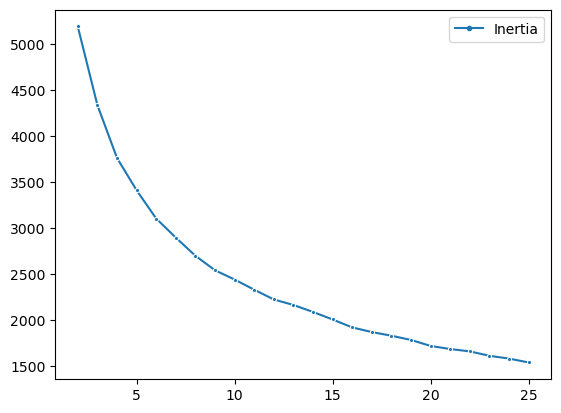

In [8]:
sns.lineplot(data = inertias, markers = '.')

There seems to be a kink around 4 or 5 but its hard to tell. Lets use Silhouette score next

## Silhouette Score

In [9]:
S_scores = pd.DataFrame(index = clusters, columns = ['Silhouette Score'])

for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled)
    S_scores.loc[i, 'Silhouette Score'] = silhouette_score(scaled, kmeans.labels_)
    
S_scores

C:\Users\Ray\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Ray\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Ray\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Ray\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

,Silhouette Score
2,0.337543
3,0.287387
4,0.254121
5,0.249648
6,0.244909
7,0.205693
8,0.232341
9,0.193052
10,0.198067
11,0.200541


<AxesSubplot: >

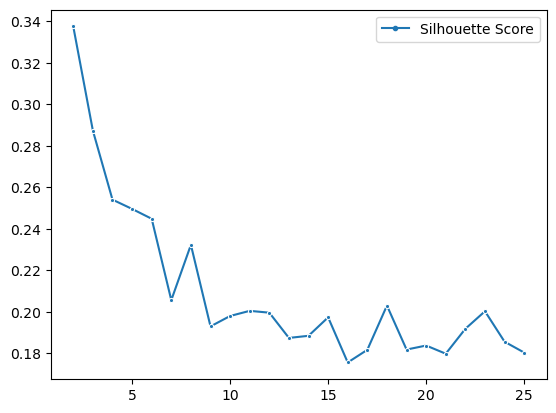

In [10]:
sns.lineplot(data = S_scores, markers = '.')

According to the Silhouette Score for this data and KMeans, the best number of clusters is 2. I will go with the Silhouette Score suggestion and say that our best K is 2

# Analysis

In [11]:
bestKmeans = KMeans(n_clusters=2, random_state=42)
bestKmeans.fit(scaled)

C:\Users\Ray\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [12]:
df['Cluster'] = bestKmeans.labels_
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1
...,...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0.0,6.8,0
846,28,2,7,34,0.359,2.021,0.0,7.0,0
847,25,4,0,18,2.802,3.210,1.0,33.4,0
848,32,1,12,28,0.116,0.696,0.0,2.9,0


In [13]:
df.value_counts(subset = ['Cluster'])

Cluster
0          668
1          182
dtype: int64

We can see that most of the datapoints clustered into cluster 0

In [14]:
pivot = pd.pivot_table(df, index = ['Cluster'])
pivot

,Age,Card Debt,DebtIncomeRatio,Defaulted,Edu,Income,Other Debt,Years Employed
Cluster,,,,,,,,
0,32.968563,0.937349,9.126796,0.215569,1.645210,33.618263,1.899054,6.492515
1,42.593407,3.923890,14.006593,0.214286,1.950549,94.598901,7.408731,16.175824


We can see a clear difference in the means of each metric except for Defaulted. That seems to be relatively evenly distributed between both clusters. Cluster 1 is older, with more income, but more debt and a slightly higher default rate

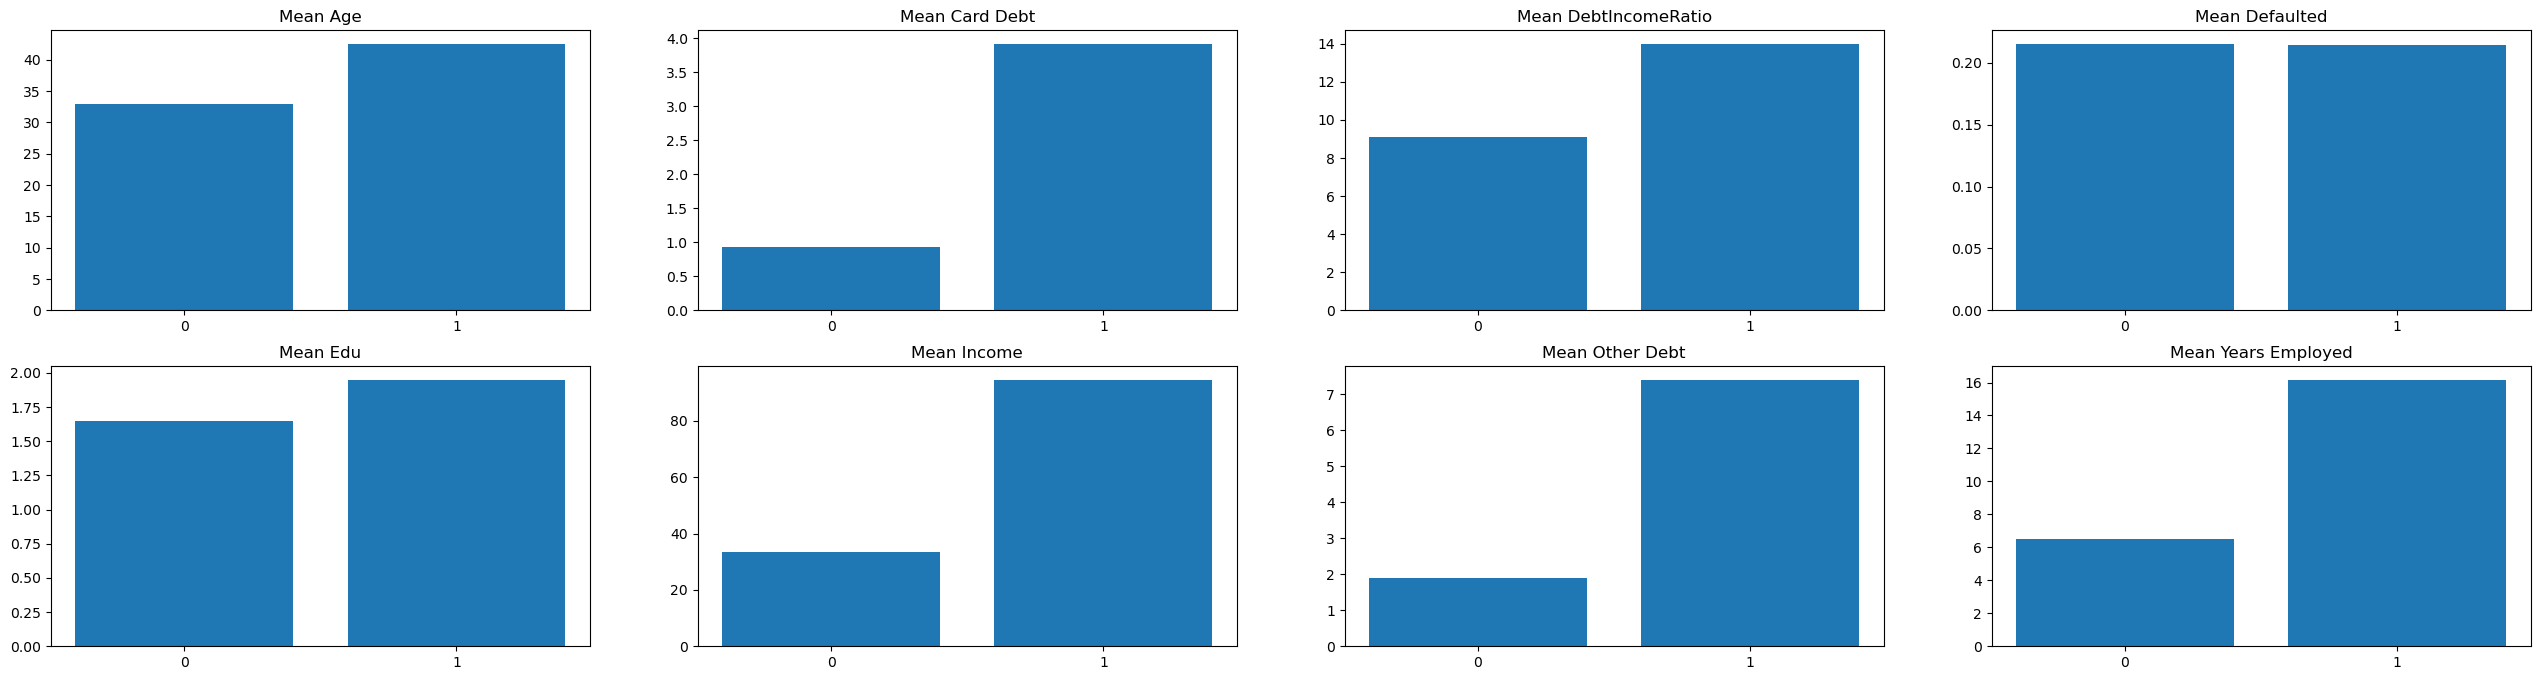

In [15]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize = (32,8))

ax = ax.ravel()

for i, col in enumerate(pivot.columns):
    ax[i].bar(pivot.index, pivot[col])
    ax[i].set_xticks(pivot.index)
    ax[i].set_title(f'Mean {col}')

## Describing the Clusters
Based on the analysis above, I would say:

**Cluster 0** is younger individuals with less money overall, and a similar default rate. These individuals hold less debt and still default at a higher rate than Cluster 1. 

**Cluster 1** is older with more income and more debt, and similar default rate. They hold more debt and default at a similar rate, but slightly lower than Cluster 0. 

### Suggestions:
These suggestions really depend on the economic conditions and the risk tolerance of the company. If the business stakeholders are willing to trade yield for volume, I would do the following:
* Because Cluster 1 holds more debt, which generates more interest income, while defaulting at a similar rate, we should continue to market to Cluster 1 and skew our underwriting to favor Cluster 1 and increase volumes.
* Due to the low debt holdings for cluster 0 and its relatively high default rate, we should price our products more aggressively to this cohort, increasing our yield on a riskier population.